<a href="https://colab.research.google.com/github/virguleria/Seoul-Bike/blob/main/Seoul_Bike_Sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name - Bike Sharing Demand Prediction**
##**Project Type**- Regression
##**Contribution** - Individual

#**Problem Statement**
##BUSINESS PROBLEM OVERVIEW

To improve mobility comfort, many urban cities are now offering rental bikes. Because it shortens the time people have to wait, the public must have access to the rental bike at the right time. At some point, ensuring that the city has a consistent supply of rental bikes becomes a major concern. The significant part is the expectation of bicycle count expected at every hour for the steady stockpile of rental bicycles.

Bike sharing systems are a way to rent bikes where a network of locations automates the membership, rental, and bike return processes throughout a city. People can rent bikes from one location and return them to another or the same location as needed through these Bike Sharing systems. Individuals can lease a bicycle through memebership or on request premise. A citywide network of automated stores oversees this procedure.

Based on historical usage patterns in relation to weather, time, and other data, we are forecasting bike sharing demand prediction for the Bike Sharing Program in Seoul in this dataset.

#**Motivation**
Several bike/scooter ride sharing facilities (e.g., Bird, Capital Bikeshare, Citi Bike) have started up lately especially in metropolitan cities like San Francisco, New York, Chicago and Los Angeles, and one of the most important problem from a business point of view is to predict the bike demand on any particular day. While having excess bikes results in wastage of resource (both with respect to bike maintenance and the land/bike stand required for parking and security), having fewer bikes leads to revenue loss (ranging from a short term loss due to missing out on immediate customers to potential longer term loss due to loss in future customer base), Thus, having a estimate on the demands would enable efficient functioning of these companies.

##<b> Import Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings("ignore")
#to display all the graph in the workbook
sns.set_style("whitegrid",{'grid.linestyle': '--'})

## <b> Loading the dataset

In [ ]:
#let's mount the google drive first
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data= pd.read_csv("/content/drive/MyDrive/Bike Sharing/SeoulBikeData (1).csv",encoding='ISO-8859-1')

In [ ]:
# Copy the data for backup
df = data.copy()

In [ ]:
# Getting feel of the data
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
# Data shape
df.shape

(8760, 14)

In [ ]:
# data dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Statistical info
df.describe(include='all').transpose()

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

##<b> Preprocessing the data

In [ ]:
# Checking null values of data
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# Checking duplicate
df.duplicated().sum()

0

In [ ]:
# converting date column dtype object to date
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
# split day of week, month and year in three column
df['day_of_week'] = df['Date'].dt.day_name() # extract week name from Date column
df["month"] = df['Date'].dt.month_name()   # extract month name from Date column
df["year"] = df['Date'].map(lambda x: x.year).astype("object")     # extract year from Date column and convert it in object type

In [ ]:
# drop the Date column
df.drop(columns=['Date'],inplace=True)

#<b> EDA

##<b> When we observe the data we realize that Hour column is a numerical column but it is a time stamp so we have to treat Hour as a categorical feature

In [ ]:
# convert Hour column integer to Categorical
df['Hour']=df['Hour'].astype('object')

In [ ]:
# Divide Data in categorical and numerical features
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [ ]:
numeric_features.head()


Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  
0           0.0            0.0  
1           0.0            0.0  
2           0.0            0.0  
3           0.0            0.0  
4           0.0            0.0

In [ ]:
categorical_features.head()

Hour Seasons     Holiday Functioning Day day_of_week    month  year
0    0  Winter  No Holiday             Yes    Thursday  January  2017
1    1  Winter  No Holiday             Yes    Thursday  January  2017
2    2  Winter  No Holiday             Yes    Thursday  January  2017
3    3  Winter  No Holiday             Yes    Thursday  January  2017
4    4  Winter  No Holiday             Yes    Thursday  January  2017

In [ ]:
# checking categorical column value count
for i in categorical_features.columns:
  print("\n ")
  print('column name  : ', i)
  print(df[i].value_counts())


 
column name  :  Hour
0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64

 
column name  :  Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

 
column name  :  Holiday
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

 
column name  :  Functioning Day
Yes    8465
No      295
Name: Functioning Day, dtype: int64

 
column name  :  day_of_week
Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: day_of_week, dtype: int64

 
column name  :  month
January      744
March        744
May          744
July         744
August       744
October      744
December     744
April        720
June         720
September    720
November     720
Februar

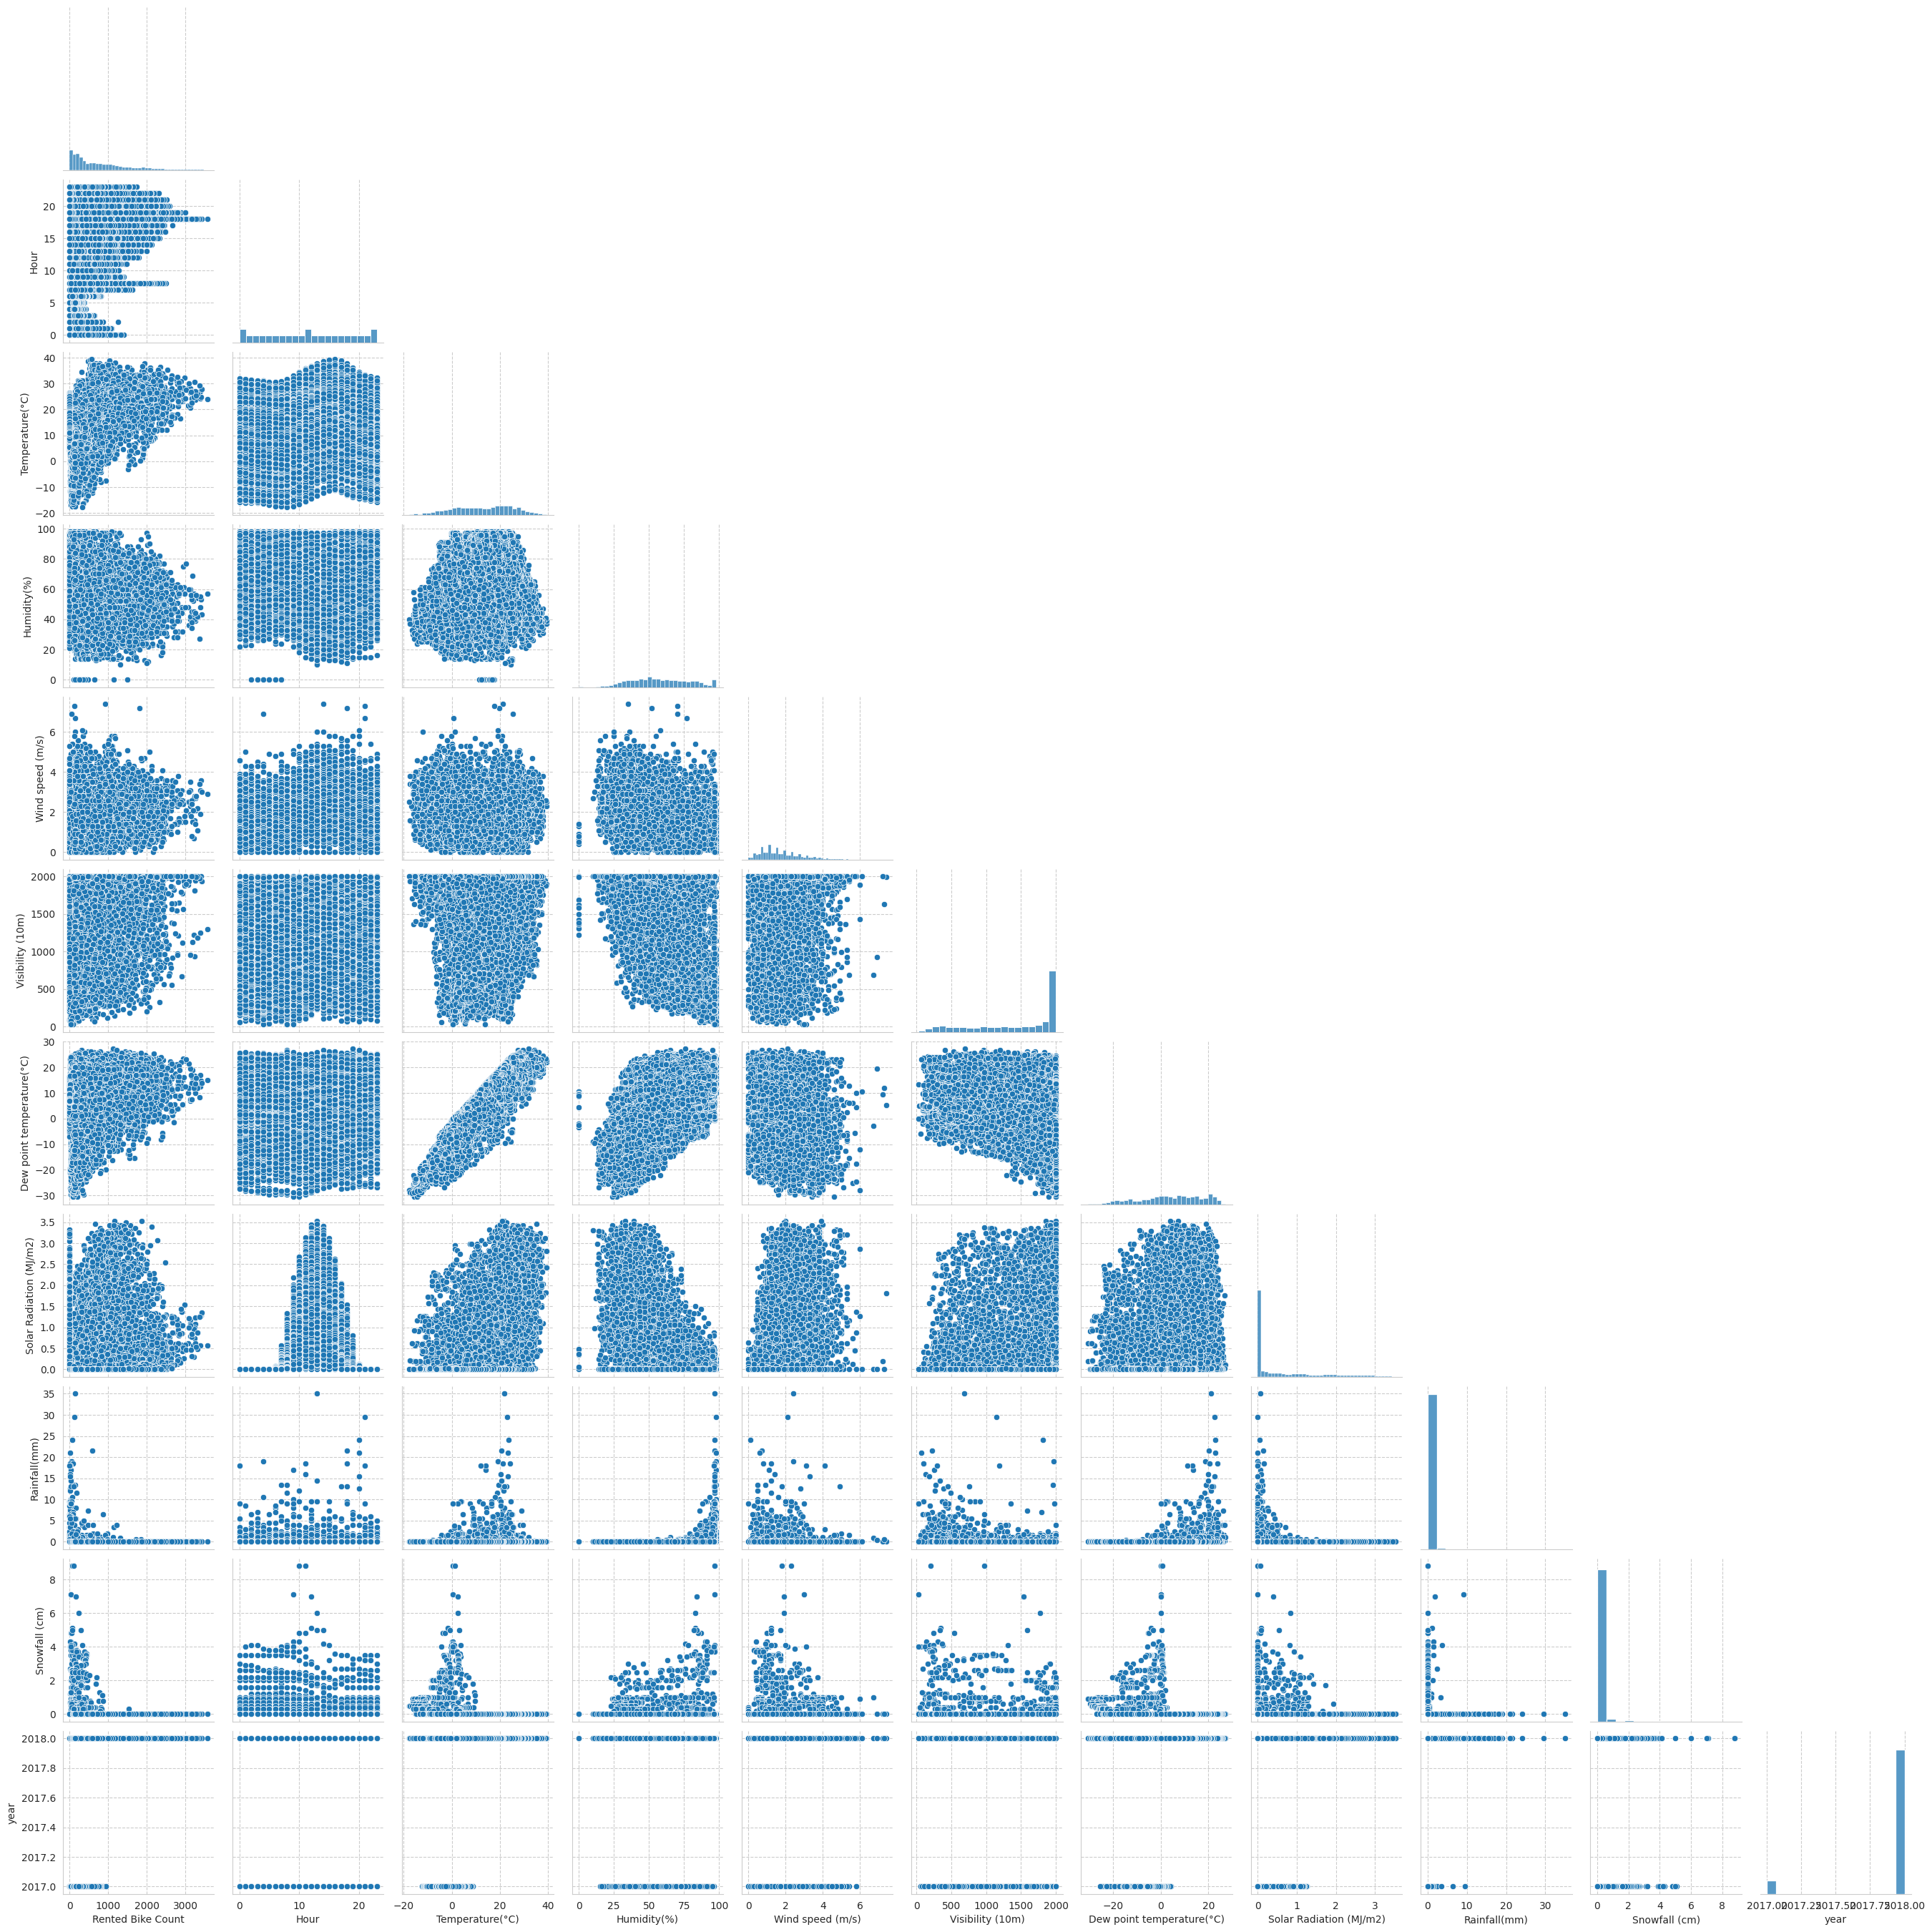

In [ ]:
#ploting pairplot for more info
sns.pairplot(df, corner=True)

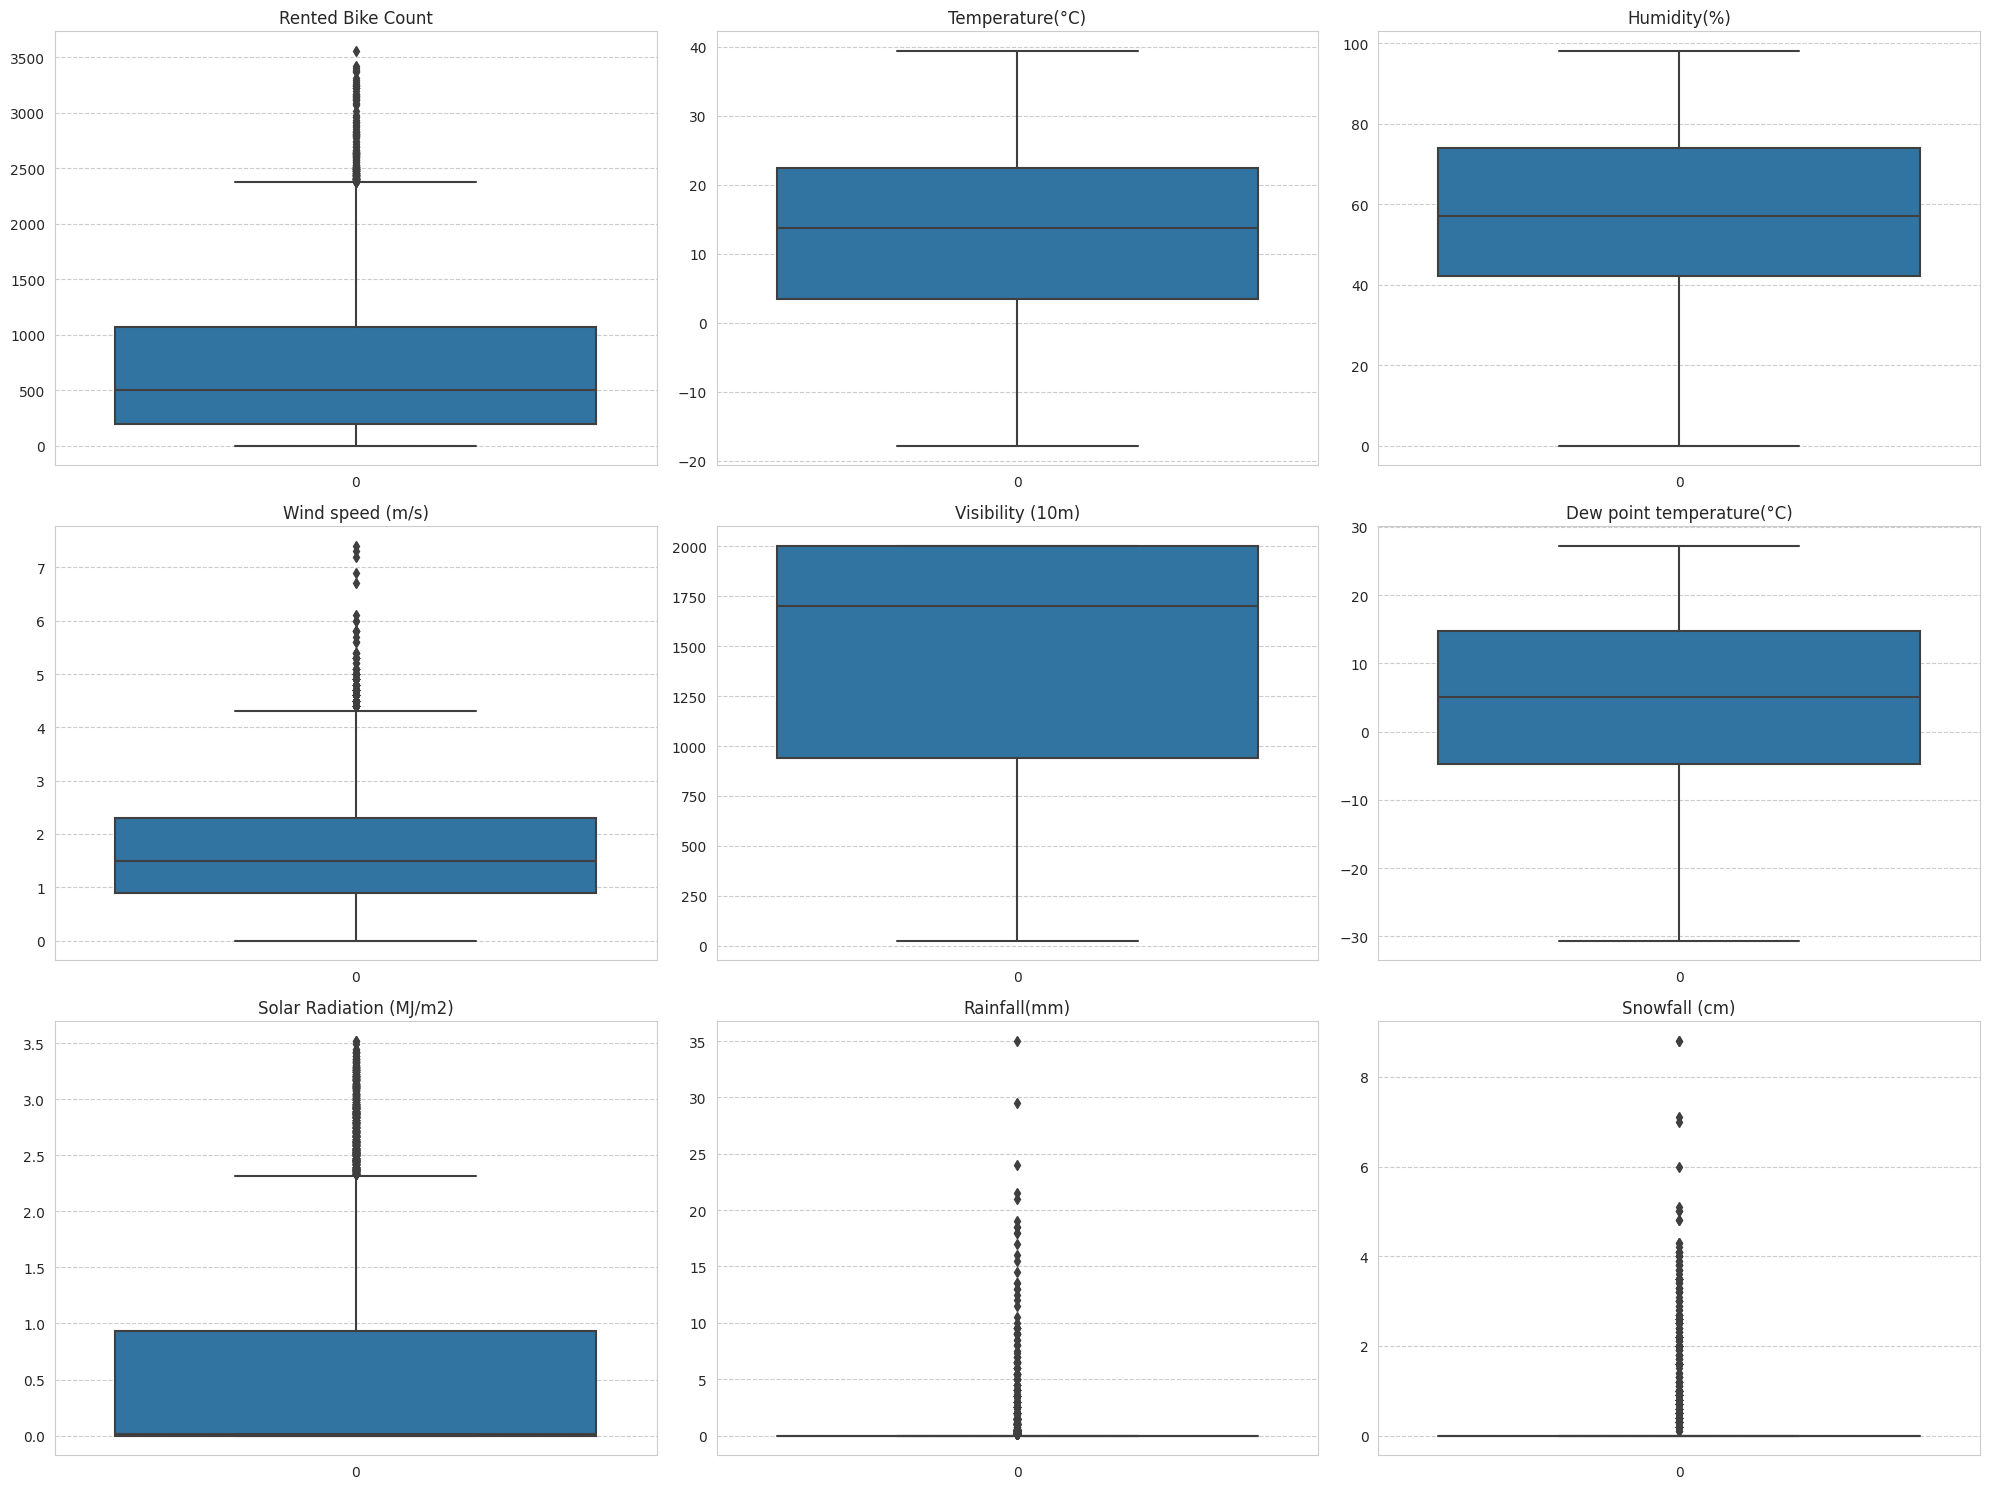

In [ ]:
# checking Outliers with seaborn boxplot
n = 1
plt.figure(figsize=(20,15))

for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()

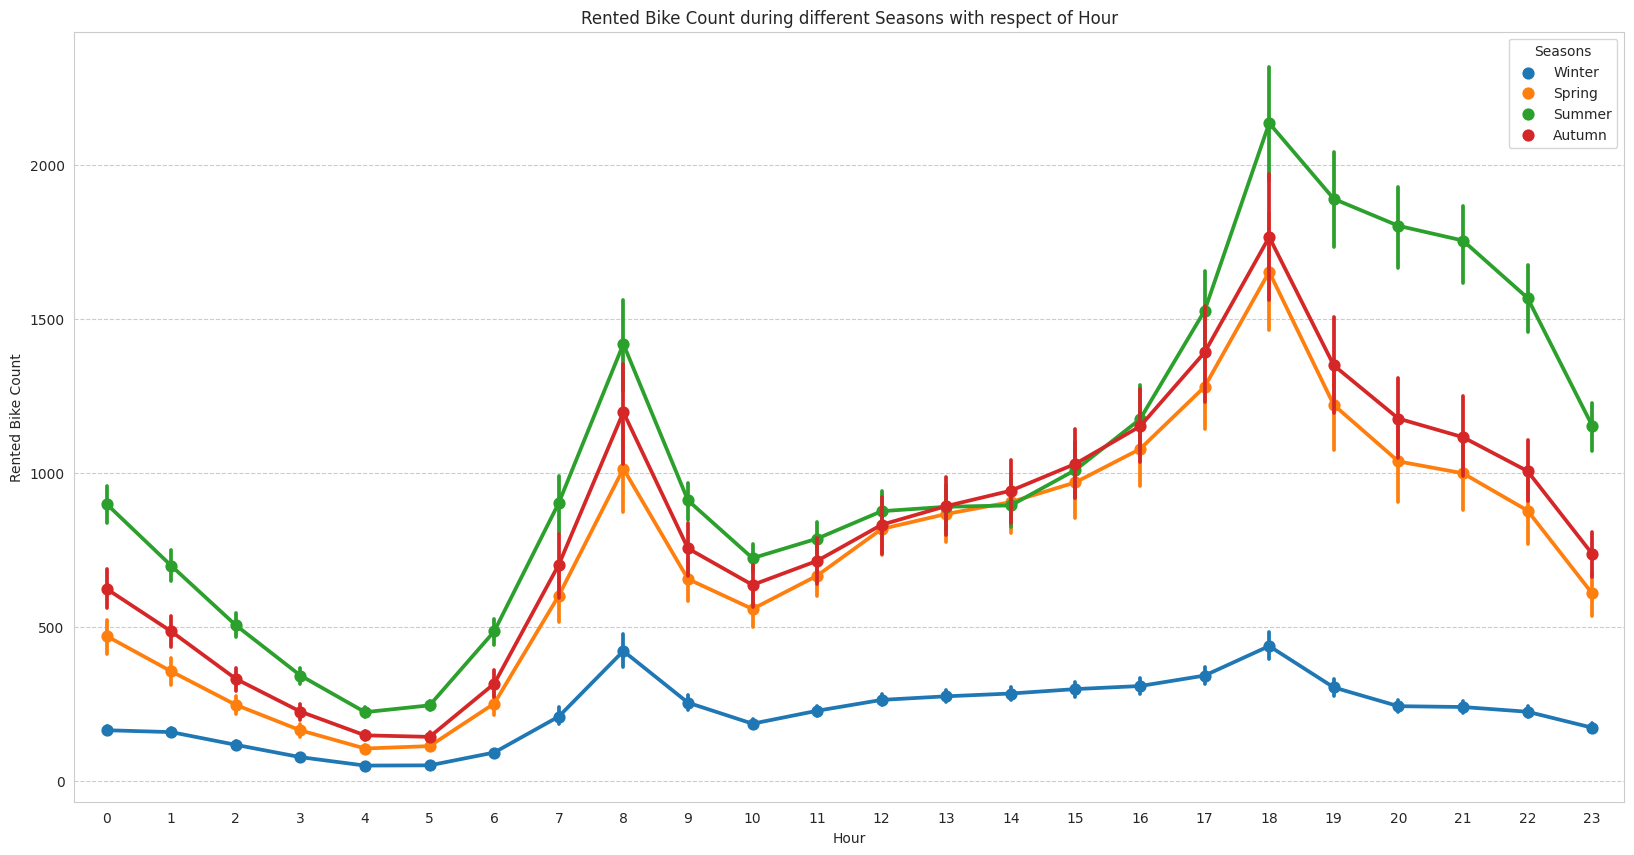

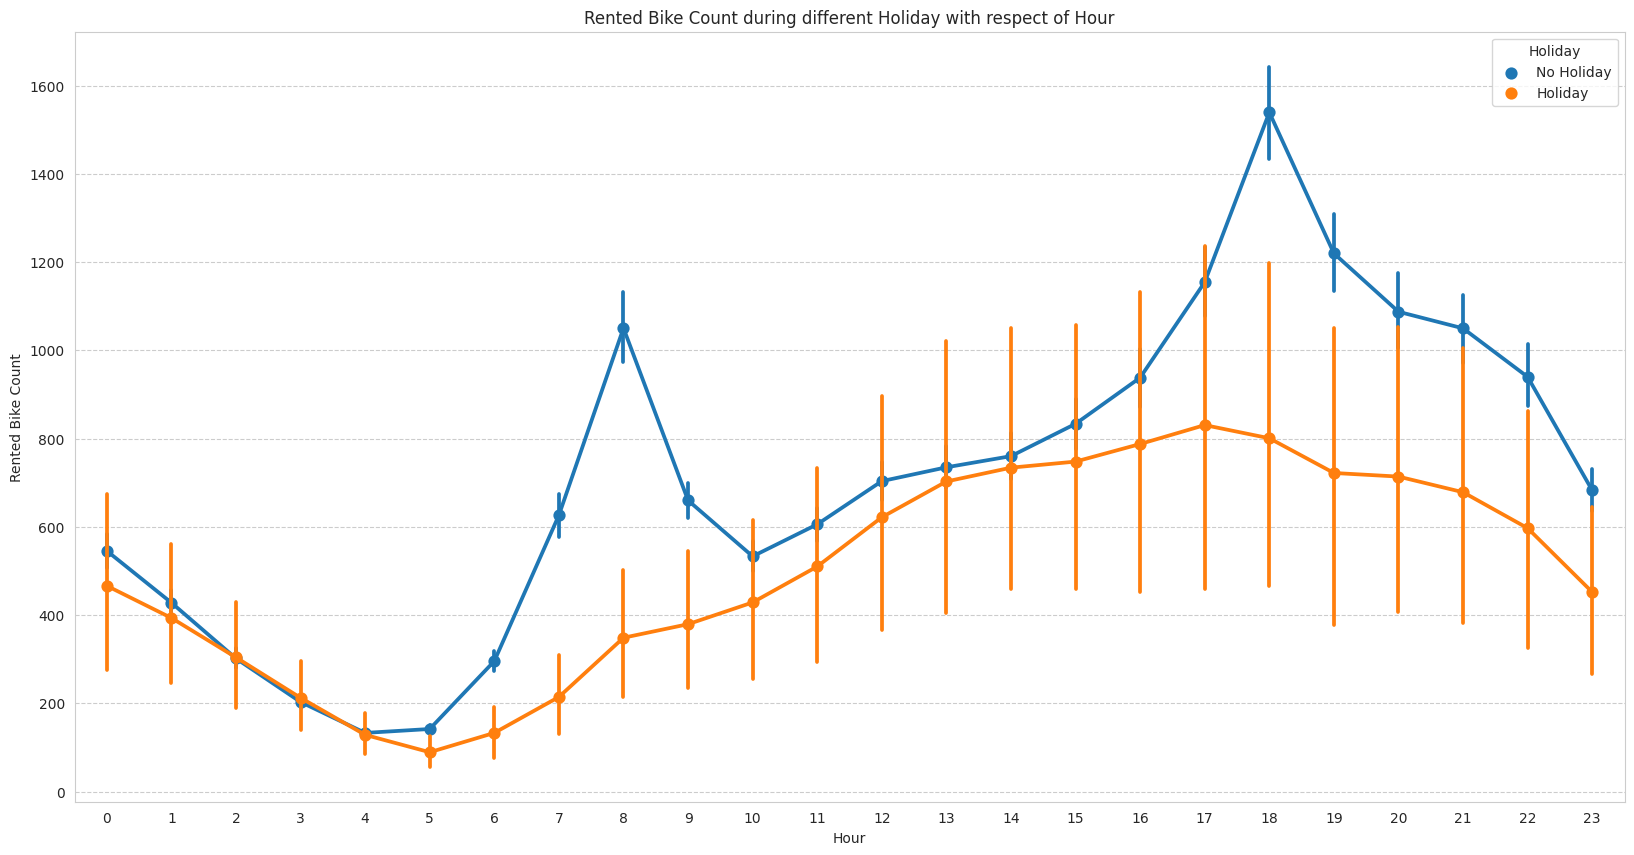

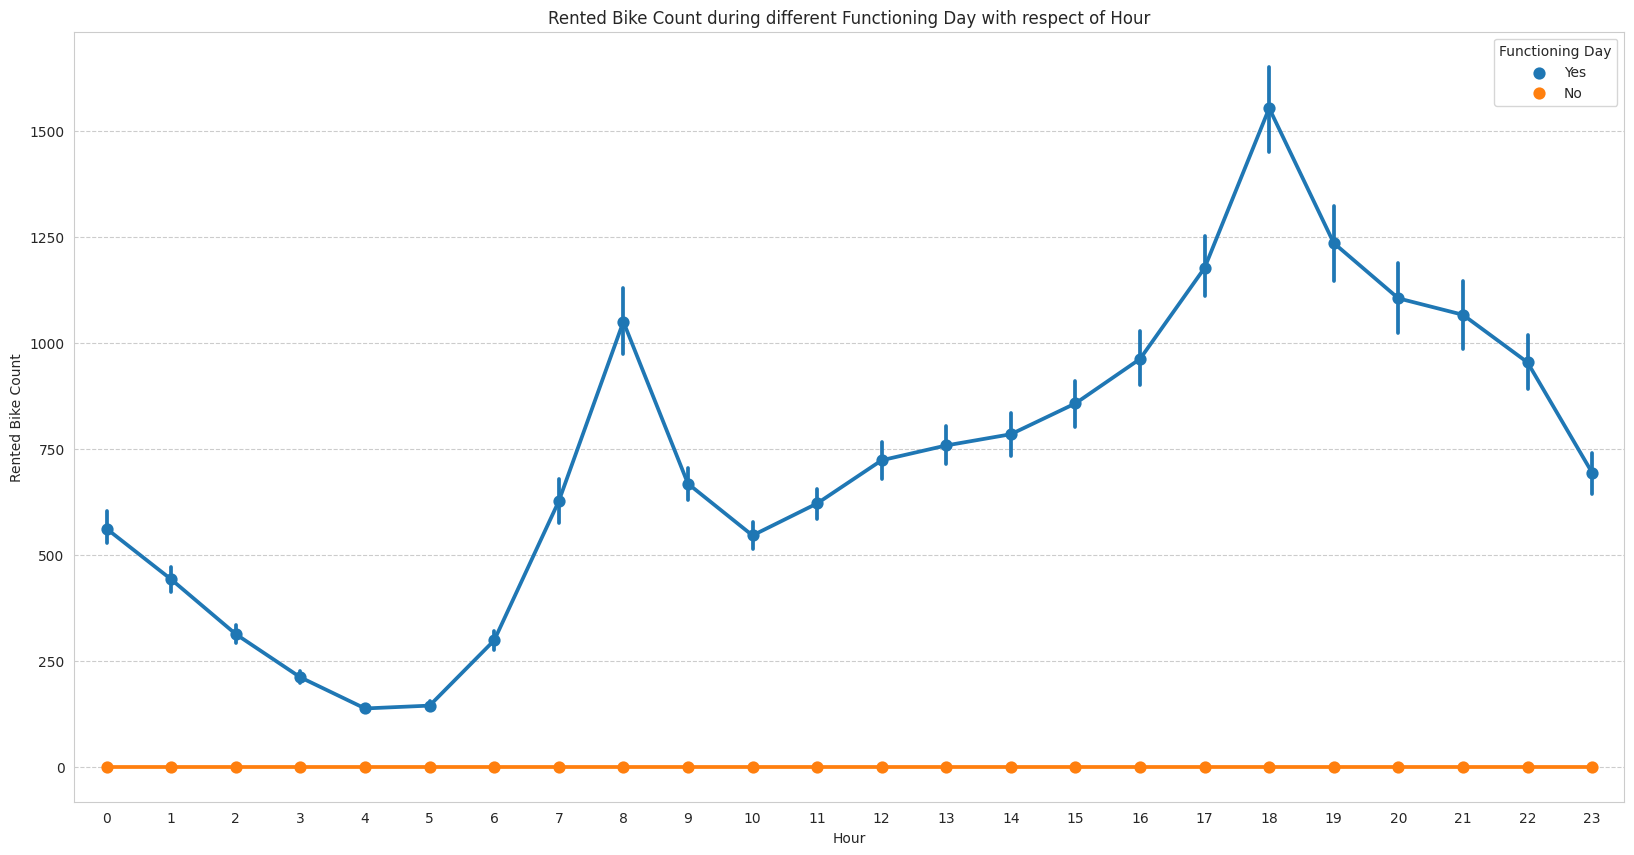

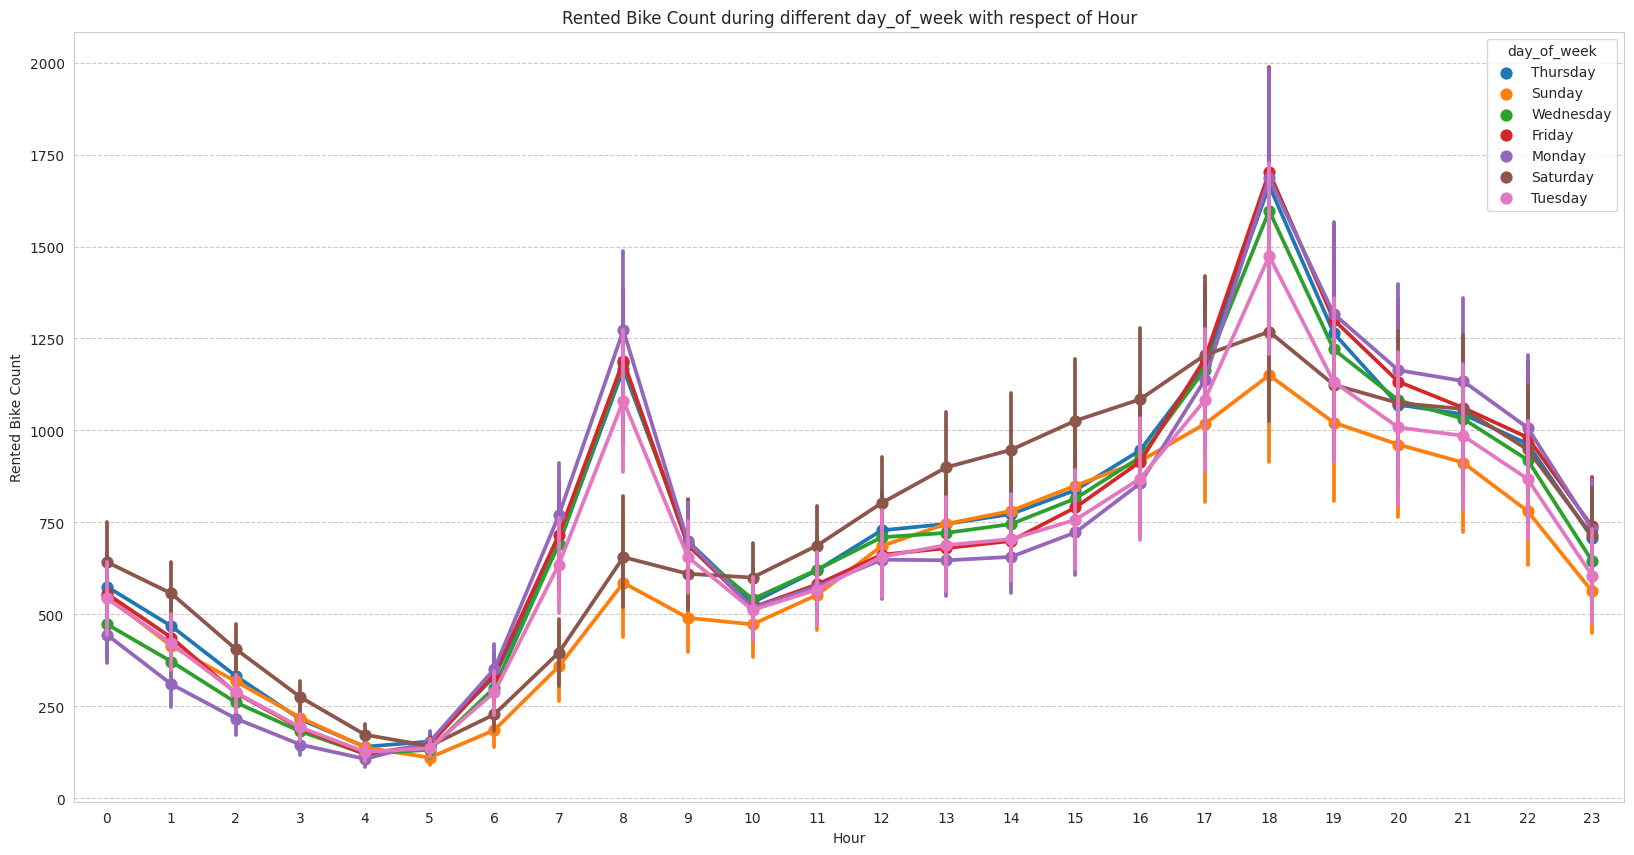

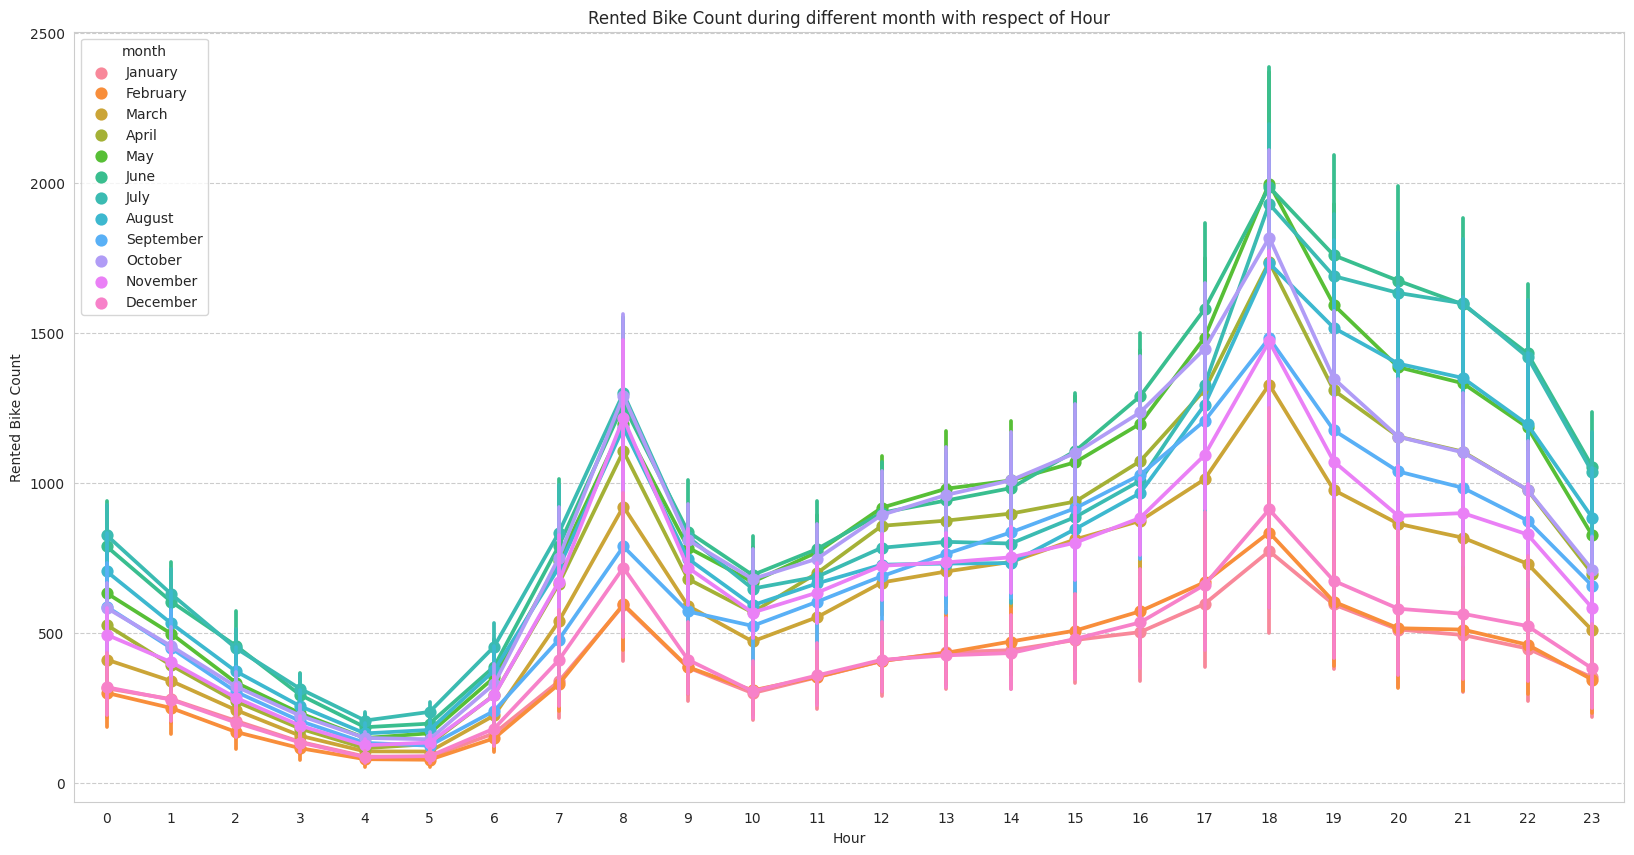

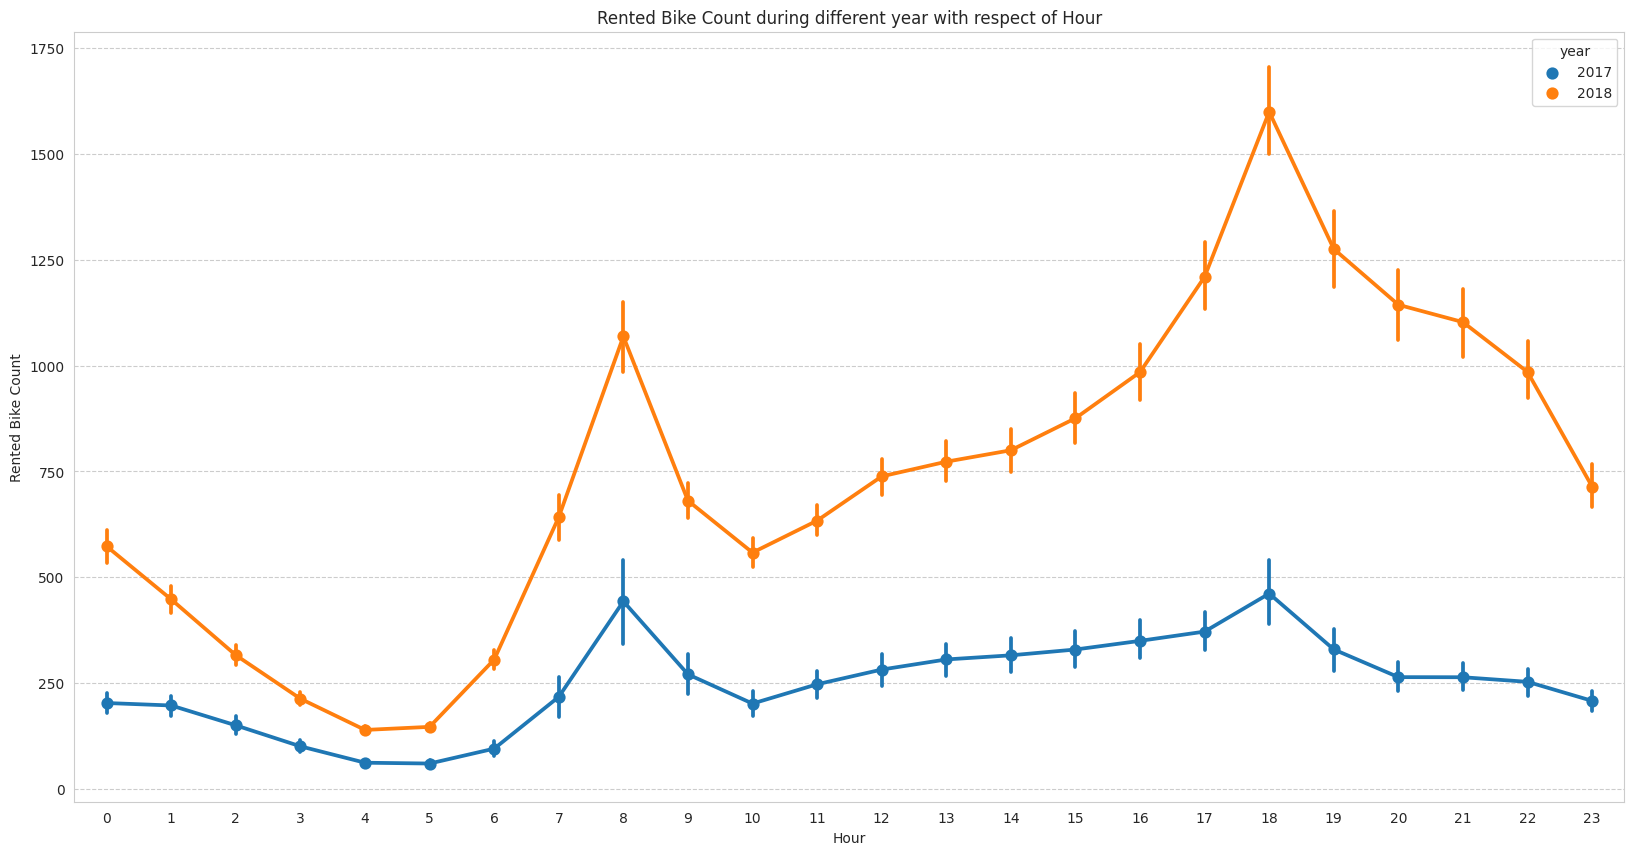

In [ ]:
# we create point plots with Rented Bike Count during different categorical features with respect of Hour
for i in categorical_features.columns:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(20,10))
    sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df[i])
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
  plt.show()

##<b> Observation
From all these pointplot we have observed a lot from every column like :

## Season
In the season column, we are able to understand that the demand is low in the winter season.

## Holiday
In the Holiday column, The demand is low during holidays, but in no holidays the demand is high, it may be because people use bikes to go to their work.

## Functioning Day
In the Functioning Day column, If there is no Functioning Day then there is no demand

## Days of week
In the Days of week column, We can observe from this column that the pattern of weekdays and weekends is different, in the weekend the demand becomes high in the afternoon. While the demand for office timings is high during weekdays, **we can further change this column to weekdays and weekends.**

## month
In the month column, We can clearly see that the demand is low in December January & Febuary, It is cold in these months and we have already seen in season column that demand is less in winters.

## year
The demand was less in 2017 and higher in 2018, it may be because it was new in 2017 and people did not know much about it.

#<b> Some more experiments for our categorical features

In [ ]:
# Converting days of weeks in Two variable from Monaday to Friday in Weekdays and Saturday and Sunday to Weekend
df['week'] = df['day_of_week'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'Weekdays')

In [ ]:
# value counts of Week column
df.week.value_counts()

Weekdays    6216
Weekend     2544
Name: week, dtype: int64

Text(0.5, 1.0, 'Rented Bike Count during weekday and weekend with respect of Hour')

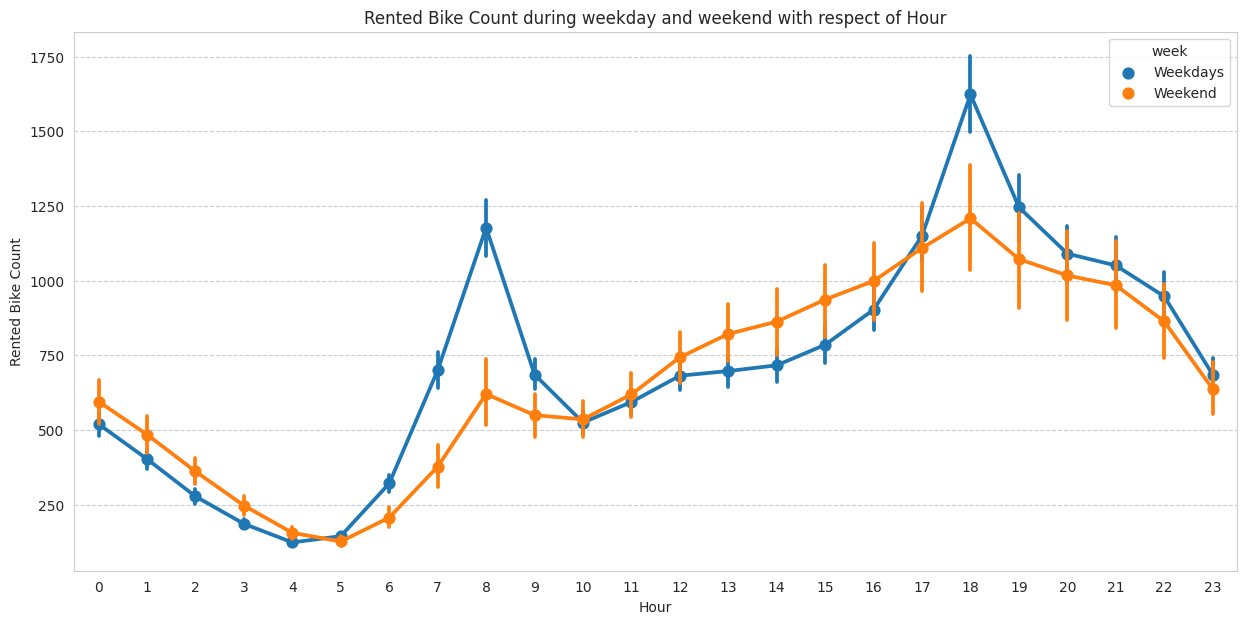

In [ ]:
# Getting feel of week column with pointplot
plt.figure(figsize=(15,7))
sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df['week'])
plt.title("Rented Bike Count during weekday and weekend with respect of Hour")

## Now we can clearly see the pattern which shows that the demand is high in the afternoon on the weekend. While there is more demand during office hours in weekdays

## Now we can drop the days of week column

In [ ]:
# droping the days of week column from df and from categorical feature
df.drop(columns=['day_of_week'], inplace=True)
categorical_features.drop(columns=['day_of_week'], inplace=True)

##<b> value Counts in percentage

In [ ]:
for i in categorical_features.columns:
  print('feature name : ',i)
  print(df[i].value_counts(normalize=True))
  print('\n')

feature name :  Hour
0     0.041667
1     0.041667
22    0.041667
21    0.041667
20    0.041667
19    0.041667
18    0.041667
17    0.041667
16    0.041667
15    0.041667
14    0.041667
13    0.041667
12    0.041667
11    0.041667
10    0.041667
9     0.041667
8     0.041667
7     0.041667
6     0.041667
5     0.041667
4     0.041667
3     0.041667
2     0.041667
23    0.041667
Name: Hour, dtype: float64


feature name :  Seasons
Spring    0.252055
Summer    0.252055
Autumn    0.249315
Winter    0.246575
Name: Seasons, dtype: float64


feature name :  Holiday
No Holiday    0.950685
Holiday       0.049315
Name: Holiday, dtype: float64


feature name :  Functioning Day
Yes    0.966324
No     0.033676
Name: Functioning Day, dtype: float64


feature name :  month
January      0.084932
March        0.084932
May          0.084932
July         0.084932
August       0.084932
October      0.084932
December     0.084932
April        0.082192
June         0.082192
September    0.082192
November  

##<b> lets take a visualization of value counts

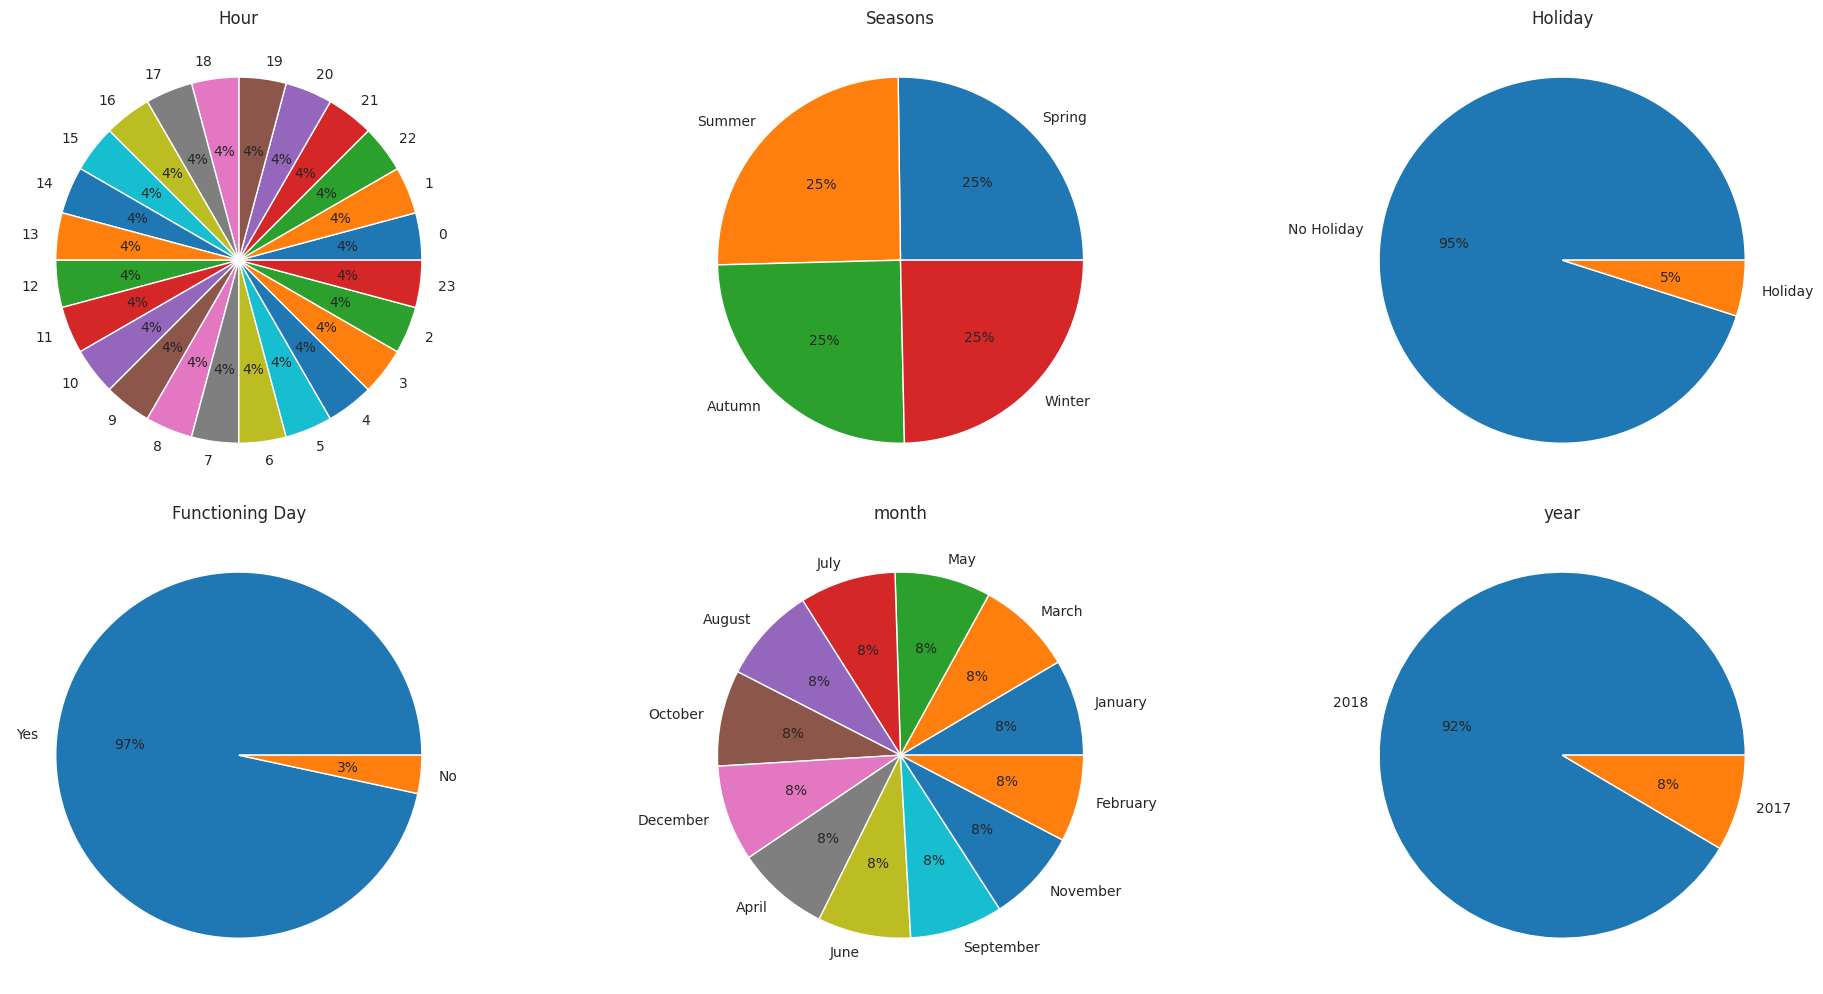

In [ ]:
# creating pieplot for all categorical feature
n=1
plt.figure(figsize=(20,15))
for i in categorical_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  plt.pie(df[i].value_counts(),labels = df[i].value_counts().keys().tolist(),autopct='%.0f%%')
  plt.title(i)
  plt.tight_layout()

##<b> Now the time of Explore our numerical feature and Trying to take some important information from the Numeical feature

##<b> Pays little attention to the skewness of our numerical features

# In this plots we observe that some of our columns is right skewed and some are left skewed we have to remember this things when we apply algorithms

## Right skewed columns are
Rented Bike Count (Its also our Dependent variable),
Wind speed (m/s),
Solar Radiation (MJ/m2),
Rainfall(mm),
Snowfall (cm),

## Left skewed columns are
Visibility (10m),
Dew point temperature(°C)


##<b> Let's try something else to get information from our Numerical features



====================================================================== Rented Bike Count ======================================================================




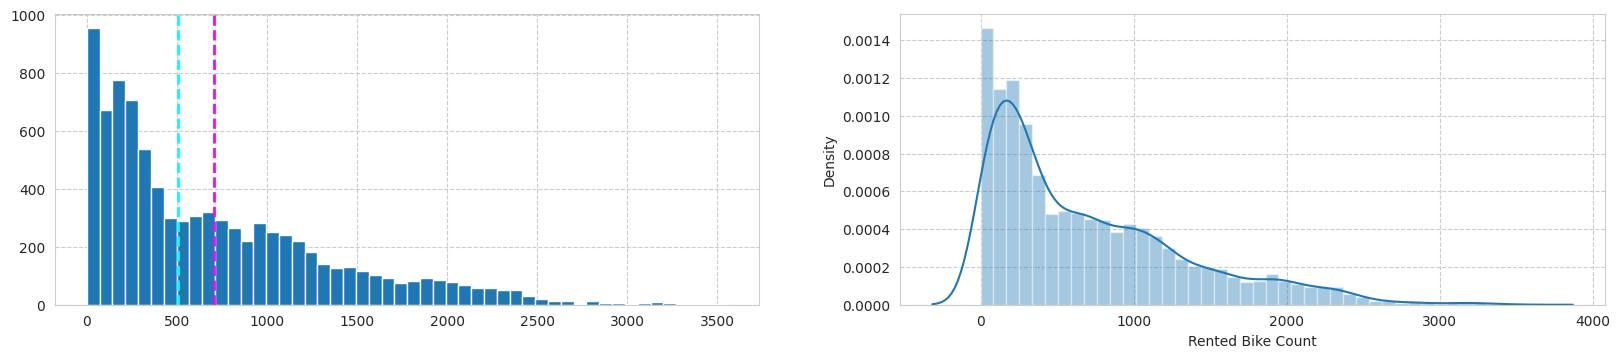



====================================================================== Temperature(°C) ======================================================================




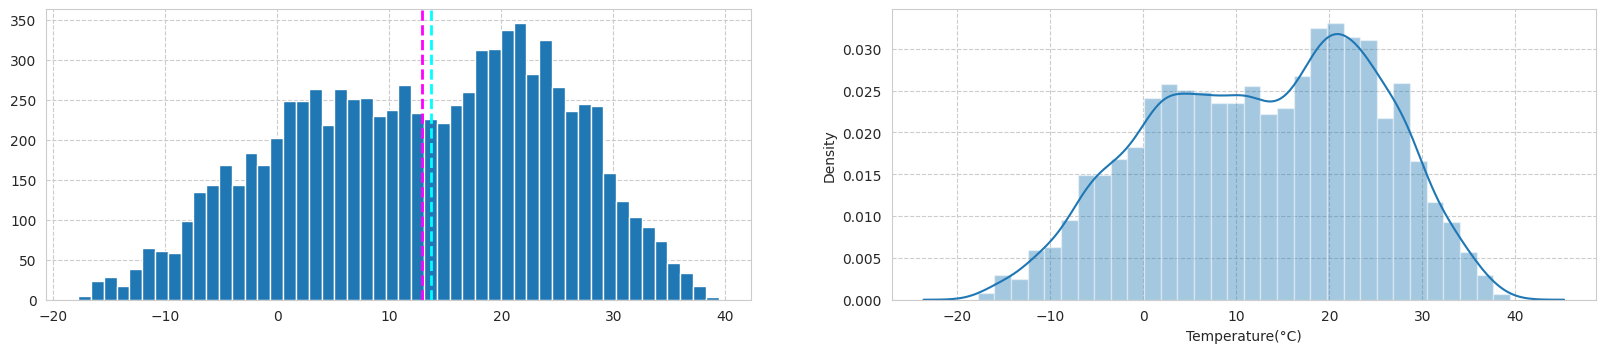



====================================================================== Humidity(%) ======================================================================




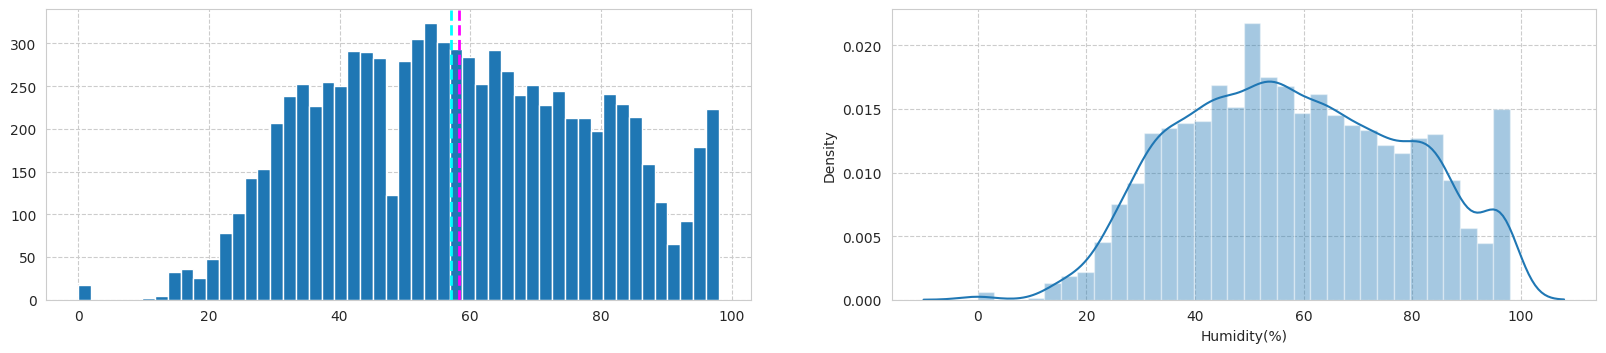



====================================================================== Wind speed (m/s) ======================================================================




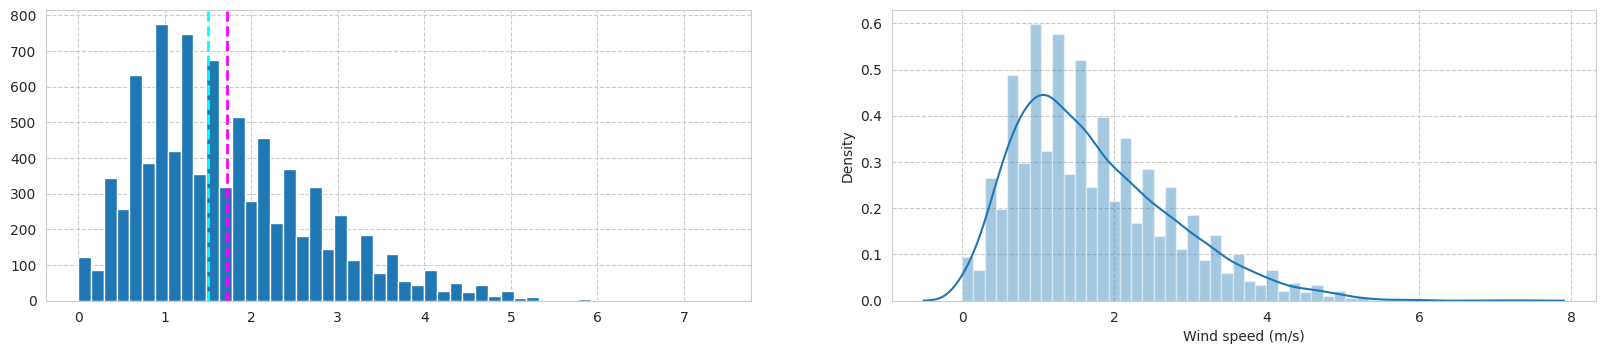



====================================================================== Visibility (10m) ======================================================================




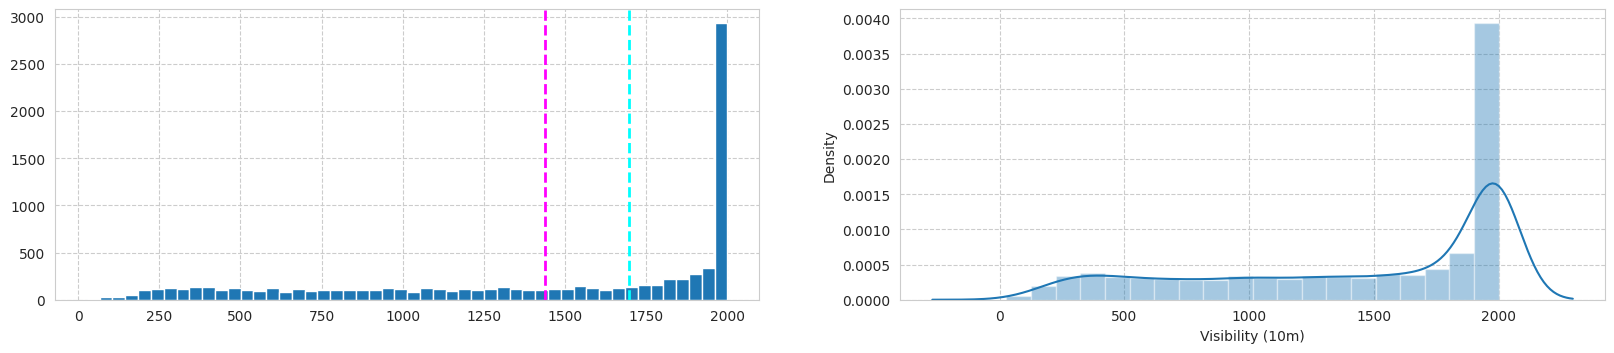



====================================================================== Dew point temperature(°C) ======================================================================




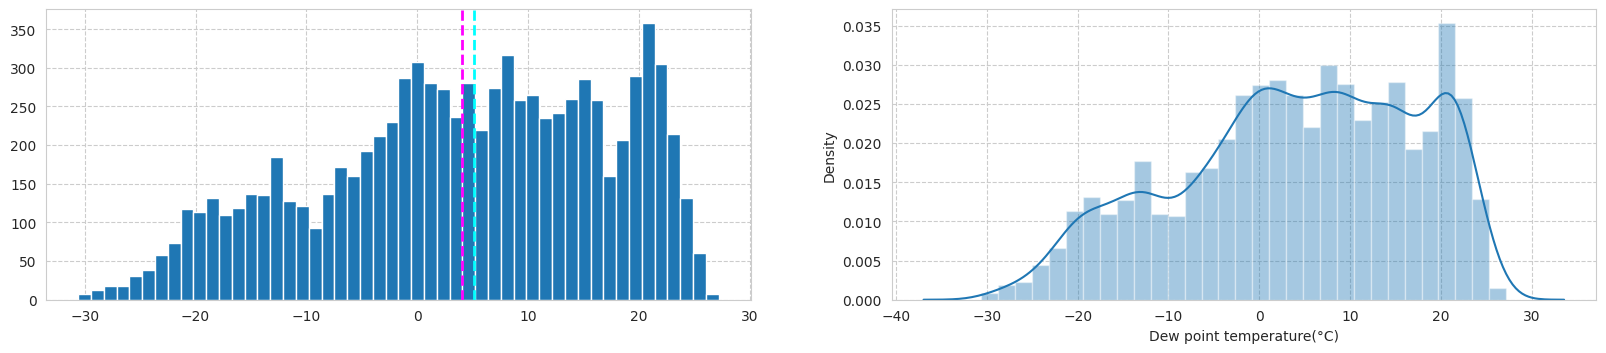



====================================================================== Solar Radiation (MJ/m2) ======================================================================




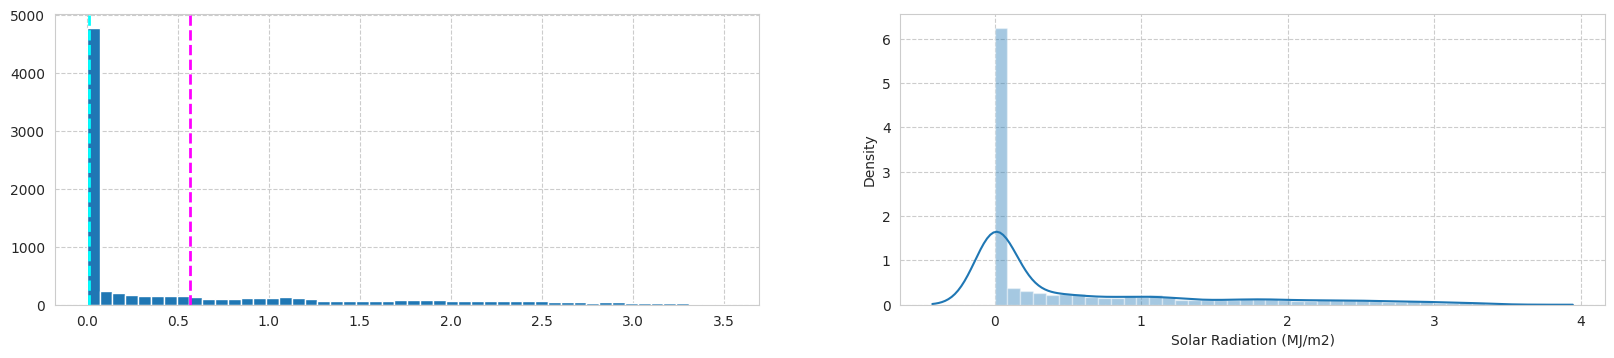



====================================================================== Rainfall(mm) ======================================================================




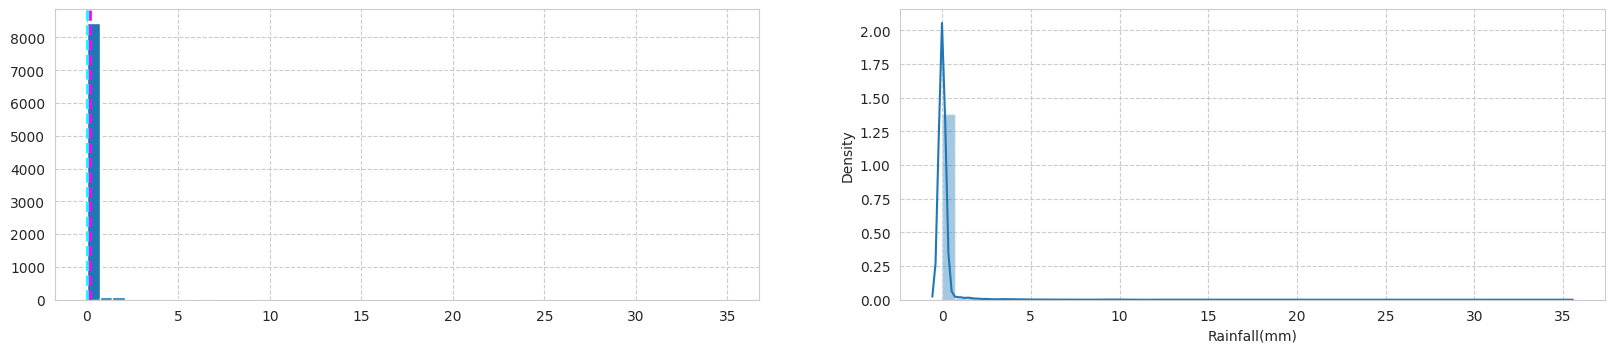



====================================================================== Snowfall (cm) ======================================================================




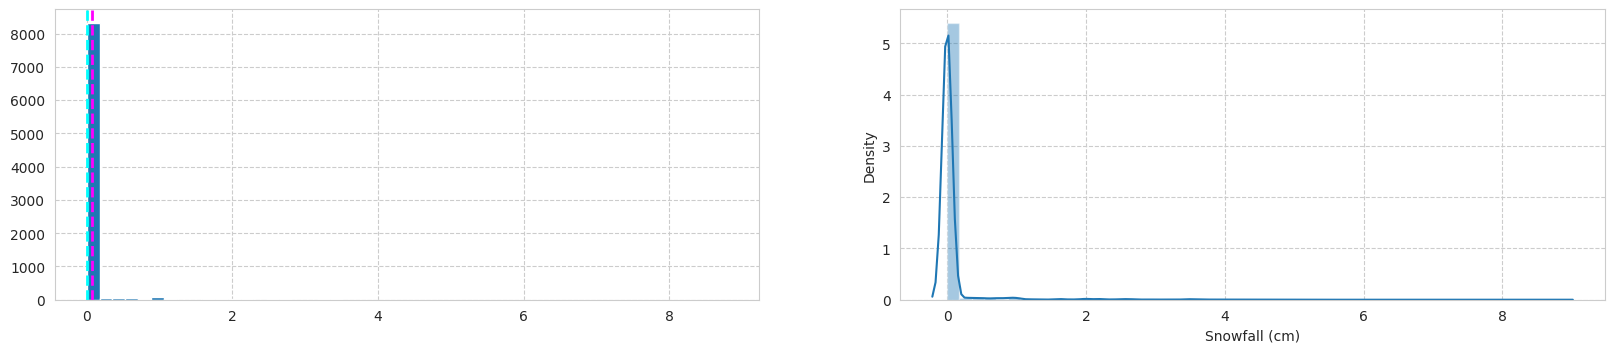

In [ ]:
#plotting histogram with mean and median, and distplot of all the numeric features of the dataset
n=1
for i in numeric_features.columns:
  plt.figure(figsize=(20,40))
  plt.subplot(9,2,n)
  n+=1
  print('\n')
  print('='*70,i,'='*70)
  print('\n')
  # fig=plt.figure()
  # ax=fig.gca()
  feature=df[i]
  feature.hist(bins=50,)
  plt.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.subplot(9,2,n)
  n+= 1
  sns.distplot(df[i])
  # plt.tight_layout()
  plt.show()


# In Distplot plots we observe that some of our columns is right skewed and some are left skewed we have to remember this things when we apply algorithms

## Right skewed columns are
Rented Bike Count (Its also our Dependent variable),
Wind speed (m/s),
Solar Radiation (MJ/m2),
Rainfall(mm),
Snowfall (cm),

## Left skewed columns are
Visibility (10m),
Dew point temperature(°C)

## From Histogram we are coming to know that the features which are skewed, their mean and the median are also skewed, which was understood by looking at the graph that this would happen.

##<b> Lets try to find how is the relation of numerical features with our dependent variable

TypeError: ignored

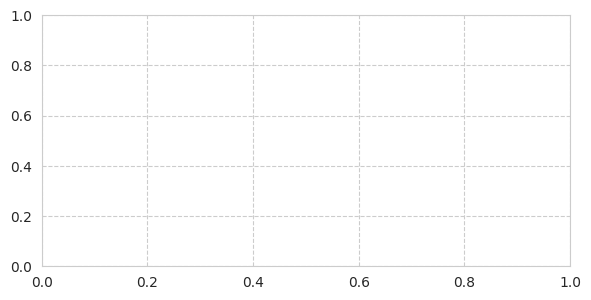

In [ ]:
# Regression plot to know relation with our independent variable
n=1
plt.figure(figsize=(15,15))
for i in numeric_features.columns:
  if i == 'Rented Bike Count':
    pass
  else:
    plt.subplot(4,2,n)
    n+=1
    sns.regplot(df[i], df['Rented Bike Count'],scatter_kws={"color": "cyan"}, line_kws={"color": "red"})
    plt.title(f'Dependend variable and {i}')
    plt.tight_layout()

## This regression plots shows that some of our features are positive linear and some are negative linear in relation to our target variable.

## <b> Now is the time to know what is the correlation of our dependent variable with the independent features

In [ ]:
# Correlation with Rented Bike Count
df.corr()['Rented Bike Count']

## As we saw in the regression plot that some features are negatively correlated and some positive, we are seeing the same thing here as well.

##<b> Let us see the correlation of all the numerical features with the heat map, so that we will also get to know the multicolinearity.

<Axes: >

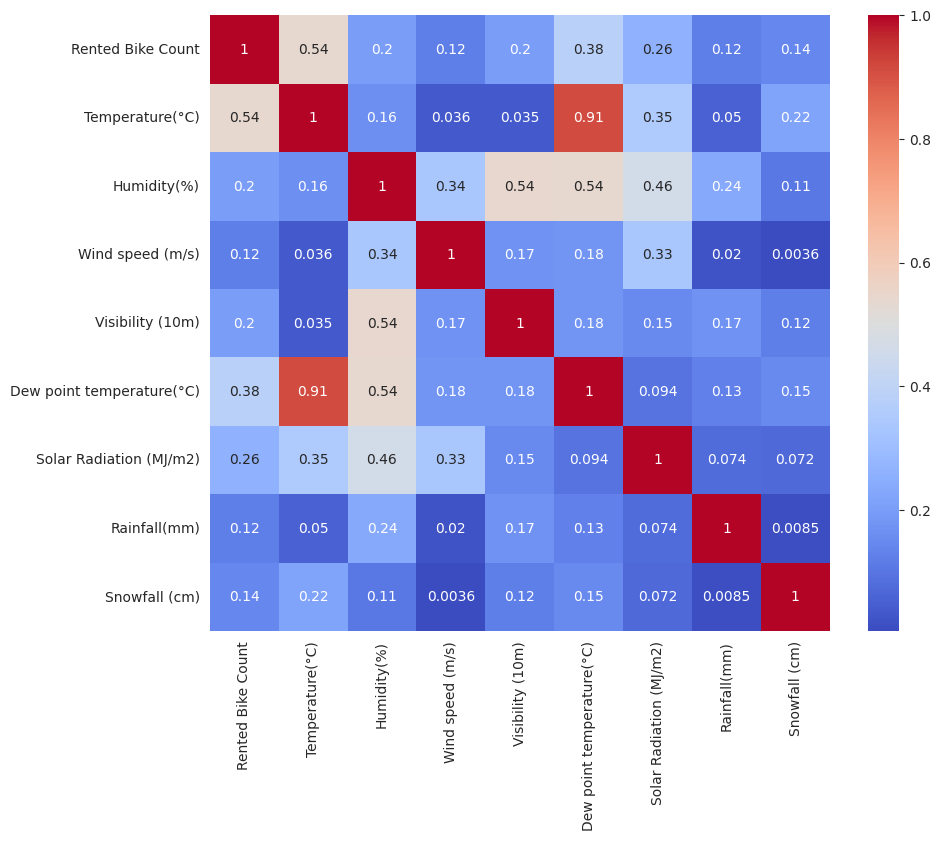

In [ ]:
# using seaborn heatmap for ploting correlation graph
plt.figure(figsize=(10,8))
sns.heatmap(abs(df.corr()), cmap='coolwarm', annot=True)

## From this graph we are able to see that there is multicollinearity in temperature(°C) and dev point temperature(°C) column.

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

variables       VIF
0          Temperature(°C)  3.166007
1              Humidity(%)  4.758651
2         Wind speed (m/s)  4.079926
3         Visibility (10m)  4.409448
4  Solar Radiation (MJ/m2)  2.246238
5             Rainfall(mm)  1.078501
6            Snowfall (cm)  1.118901

In [ ]:
# Using Pandas get Dummies for Encoding categorical features
new_df=pd.get_dummies(df,drop_first=True,sparse=True)

In [ ]:
new_df.head(2)

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  Hour_1  ...  month_January  month_July  \
0           0.0            0.0       0  ...              1           0   
1           0.0            0.0       1  ...              1           0   

   month_June  month_March  month_May  month_November  month_October  \
0           0            0          0               0              0   
1           0            0          0               0              0   

   month_September  year_2018  week_Weekend  
0                0          0             0  
1                0          0             0  

[2 rows x 50 columns]

##<b> We saw that our dependent variable is right skewed, it needs to be normalized.
##We do some experiments to normalize it

Text(0.5, 1.0, 'Square root')

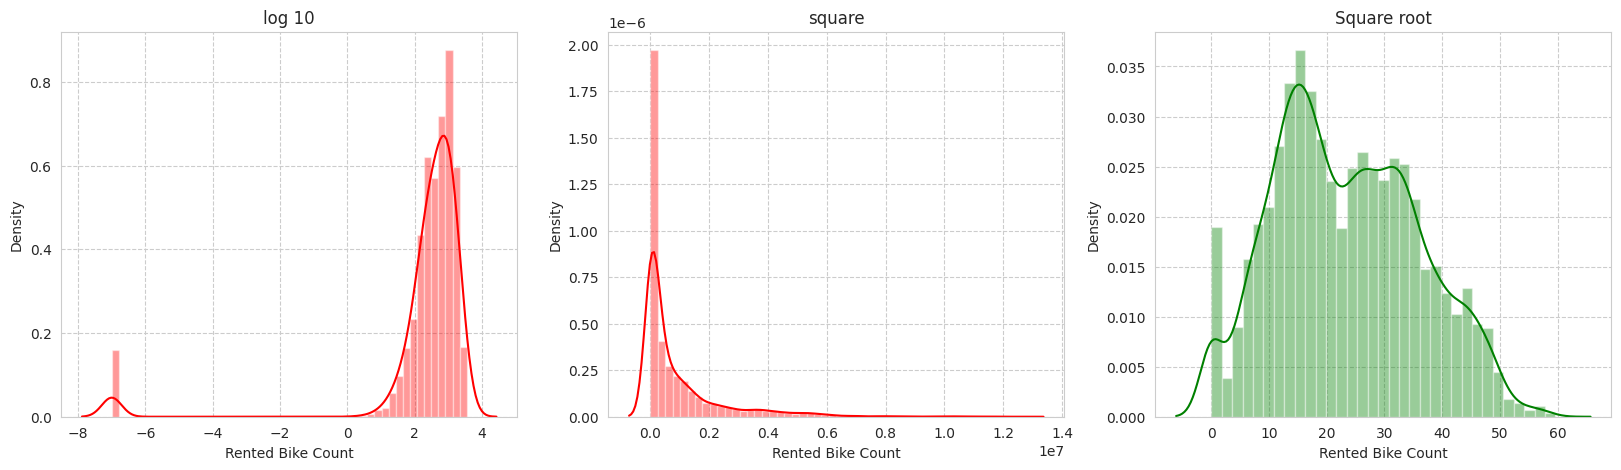

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
# here we use log10
sns.distplot(np.log10(new_df['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log 10")
# here we use square
sns.distplot((new_df['Rented Bike Count']**2),ax=axes[1],color='red').set_title("square")
# here we use square root
sns.distplot(np.sqrt(new_df['Rented Bike Count']),ax=axes[2], color='green').set_title("Square root")

## Our data in green plot is normalized to some extent: so we will go with square root on our dependent variable

## Divide data in dependent feature and Independent feature

In [ ]:
X = new_df.drop(columns=['Rented Bike Count','Dew point temperature(°C)'])
y = np.sqrt(new_df['Rented Bike Count'])

In [ ]:
# Train test split our data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)

## Geeting Feel of my X_train, X_test, y_train, y_test

In [ ]:
X_train.head()

Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
2223             16.0           14               2.2              1828   
798              -6.7           48               2.4              1991   
7752             11.3           71               1.2              1997   
734               3.0           28               3.8              1956   
2881             11.5           77               2.0               593   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Hour_1  Hour_2  \
2223                     2.33           0.0            0.0       0       0   
798                      0.00           0.0            0.0       0       0   
7752                     0.00           0.0            0.0       0       0   
734                      1.10           0.0            0.0       0       0   
2881                     0.00           0.0            0.0       1       0   

      Hour_3  ...  month_January  month_July  month_June  month_March  \
2223       0  ...              0           0           0            1   
798        0  ...              0           0           0            1   
7752       0  ...              0           0           0            0   
734        0  ...              0           0           0            0   
2881       0  ...              0           0           0            1   

      month_May  month_November  month_October  month_September  year_2018  \
2223          0               0              0                0          1   
798           0               0              0                0          1   
7752          0               0              1                0          1   
734           0               0              0                0          0   
2881          0               0              0                0          1   

      week_Weekend  
2223             1  
798              0  
7752             1  
734              1  
2881             1  

[5 rows x 48 columns]

In [ ]:
X_test.head()

Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
6056             27.2           69               1.8              1999   
5556             32.6           51               2.1               800   
5990             34.0           50               1.2              1744   
7674             16.9           47               1.4              1637   
3319              6.4           51               1.0              1398   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Hour_1  Hour_2  \
6056                     0.70           0.0            0.0       0       0   
5556                     3.21           0.0            0.0       0       0   
5990                     1.68           0.0            0.0       0       0   
7674                     0.11           0.0            0.0       0       0   
3319                     0.19           0.0            0.0       0       0   

      Hour_3  ...  month_January  month_July  month_June  month_March  \
6056       0  ...              0           0           0            0   
5556       0  ...              0           1           0            0   
5990       0  ...              0           1           0            0   
7674       0  ...              0           0           0            0   
3319       0  ...              0           0           0            0   

      month_May  month_November  month_October  month_September  year_2018  \
6056          0               0              1                0          1   
5556          0               0              0                0          1   
5990          0               0              0                0          1   
7674          0               0              1                0          1   
3319          0               0              0                0          1   

      week_Weekend  
6056             0  
5556             0  
5990             1  
7674             0  
3319             0  

[5 rows x 48 columns]

In [ ]:
y_train.head()

2223    35.185224
798     11.704700
7752    29.849623
734     16.186414
2881    22.405357
Name: Rented Bike Count, dtype: float64

In [ ]:
y_test.head()

6056    41.569219
5556    28.670542
5990    25.651511
7674    52.115257
3319    32.908965
Name: Rented Bike Count, dtype: float64

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6570, 48), (2190, 48), (6570,), (2190,))

##<b>Defining a function to train and evaluate the model with Diffrent parameters like MSE , RMSE, R2 Score, Best_params, Best score, Coefficient , intercept and feature importance  

In [ ]:
# Appending all models parameters to the corrosponding list
mean_absolut_error = []
mean_sq_error=[]
root_mean_sq_error=[]
training_score =[]
r2_list=[]
adj_r2_list=[]
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def score_metrix (model,X_train,X_test,Y_train,Y_test):

  '''
    train the model and gives mae, mse,rmse,r2,adj r2 score of the model

  '''
  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)

  print('\n')

  try:
      # finding the best parameters of the model if any
    print('*'*20, 'Best Parameters & Best Score', '*'*20)
    print(f"The best parameters found out to be :{model.best_params_} \nwhere model best score is:  {model.best_score_} \n")
  except:
    print('None')



  #predicting the Test set and evaluting the models
  print('\n')
  print('*'*20, 'Evalution Matrix', '*'*20)

  if model == Linear or model == L1 or model == L2:
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

    #Top 10 feature importance graph
    try:
      best = model.best_estimator_
      features = new_X.columns
      importances = best.feature_importances_[0:10]
      indices = np.argsort(importances)
      plt.figure(figsize=(10,15))
      plt.title('Feature Importance')
      plt.barh(range(len(indices)), importances[indices], color='pink',edgecolor='red' ,align='center')
      plt.yticks(range(len(indices)), [features[i] for i in indices])
      plt.xlabel('Relative Importance')
      plt.show()

    except:
      pass

  # Here we appending the parameters for all models
  mean_absolut_error.append(MAE)
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  training_score.append(training)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)


  # print the cofficient and intercept of which model have these parameters and else we just pass them
  if model == Linear:
    print("*"*25, "coefficient", "*"*25)
    print(model.coef_)
    print('\n')
    print("*"*25, "Intercept", "*"*25)
    print('\n')
    print(model.intercept_)
  else:
    pass
  print('\n')

  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)

  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values
    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass



## transforming X_train and X_test with yeo-johnson transformation




In [ ]:
from sklearn.preprocessing import PowerTransformer,MinMaxScaler
yeo = PowerTransformer()
X_train_trans = yeo.fit_transform(X_train) # fit transform the training set
X_test_trans = yeo.transform(X_test) #tranform the test set

#<b> Linear Regression

In [ ]:
# imporing linear models
from sklearn.linear_model import LinearRegression,Lasso,Ridge
Linear = LinearRegression()

Training score  = 0.7948131223235951


******************** Best Parameters & Best Score ********************
None


******************** Evalution Matrix ********************
MAE : 207.41666780493392
MSE : 93868.9203184755
RMSE : 306.38035237017976
R2 : 0.7706043627123733
Adjusted R2 :  0.7654614432402547 

************************* coefficient *************************
[ 4.84244127 -1.46299864 -0.10044715  0.29088451  3.15181294 -2.97282854
  0.01791101 -0.43657148 -1.06081323 -1.41706587 -2.02154163 -1.92712698
 -0.95802639  0.01025612  0.86074665 -0.51390573 -1.51276992 -1.57296373
 -1.37571477 -1.34499939 -1.29350974 -1.09078416 -0.68059033  0.28889088
  1.67507948  1.32330204  1.31495447  1.37700904  1.00303563  0.34014356
 -1.32715513 -1.38178009 -3.39349515  0.60842228  5.30792837 -0.23217729
  0.00764478 -0.20277928 -0.01720571 -0.28303424  0.95185455 -0.17567796
  0.37627943  0.06519845  0.35172126 -0.04266782 -0.57320668 -0.39958343]


************************* Intercept ***

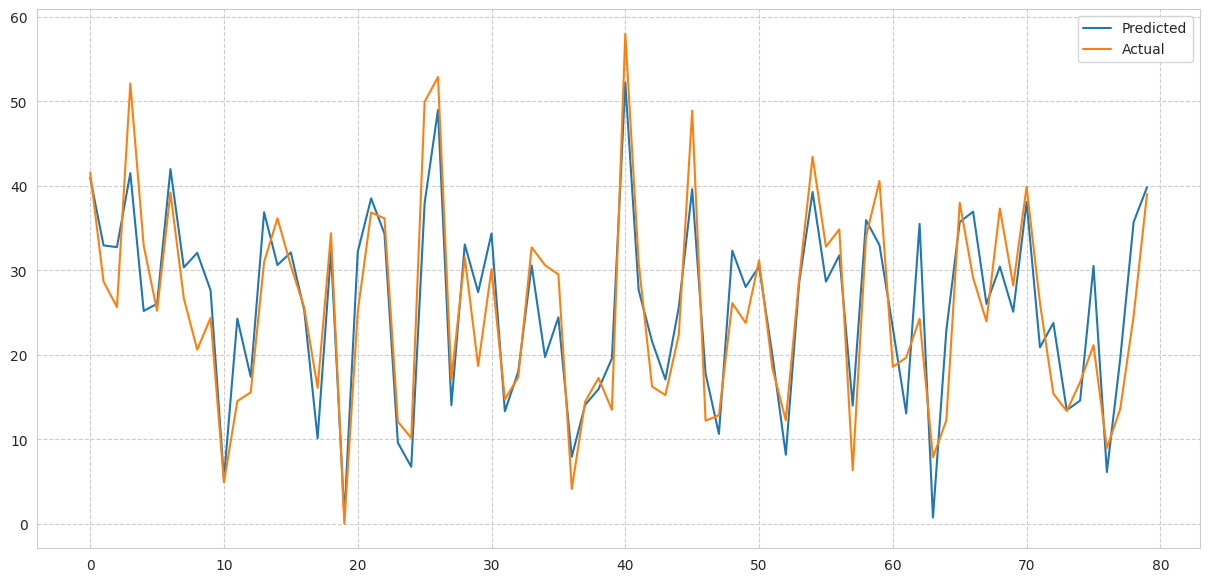

In [ ]:
# importing Fitting the linear regression model with our score matrix function
score_metrix(Linear,X_train_trans,X_test_trans,y_train,y_test)

#<b> RandomForest Regression

In [ ]:
# Importing Randomfroest from sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor

In [ ]:
param_grid = {'n_estimators':[100,150,200],
              'min_samples_leaf':[6,4,2],
              'max_depth' : [30,20,25],
              'min_samples_split': [30,25,20],
              'max_features':['auto','sqrt','log2']
              }

In [ ]:
# Using Grid SearchCV
Ranom_forest_Grid_search = GridSearchCV(RandomForestRegressor(),param_grid=param_grid,n_jobs=-1,cv=5)

#**XGBRegressor**

In [ ]:
#importing XGBoost Regressor
from xgboost import XGBRegressor

In [ ]:
params = {
          'subsample': [0.5],#0.3,0.7],
          'n_thread': [4], #2,6],
          'n_estimators': [1000],#range(200,1500,50),
          'min_child_weight': [2],#3,5],
          'max_depth': [4],#range(2,8,2),
          'learning_rate': [0.02],#0.04,0.06],
          'eval_mertric': ['rmse'],#'mse',],
          'colsample_bytree': [0.7],#0.5,1.0],
          }

In [ ]:
#creating xgb grid model
xgb_grid_search= GridSearchCV(XGBRegressor(silent=True),param_grid=params,cv=5)